In [3]:
%pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install tensorflow-cpu


In [1]:

import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [7]:

mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils 


In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False                  
    results = model.process(image)                
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [9]:
def draw_landmarks(image, results):

    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [ ]:
def draw_styled_landmarks(image, results):

    



    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2)
        )


In [15]:
def draw_landmarks(image, results):


    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 

In [12]:
mp_holistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():


        ret, frame = cap.read()


        image, results = mediapipe_detection(frame, holistic)
        print(results)
        

        draw_styled_landmarks(image, results)


        cv2.imshow('OpenCV Feed', image)


        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [57]:
len(results.left_hand_landmarks.landmark) 

21

In [58]:
import matplotlib.pyplot as plt
results
frame

array([[[142, 130, 127],
        [140, 131, 127],
        [137, 132, 128],
        ...,
        [210, 211, 217],
        [211, 211, 216],
        [211, 211, 216]],

       [[143, 131, 132],
        [142, 130, 133],
        [139, 130, 134],
        ...,
        [212, 213, 219],
        [214, 212, 217],
        [216, 213, 218]],

       [[140, 129, 134],
        [143, 130, 138],
        [143, 130, 138],
        ...,
        [215, 213, 220],
        [220, 213, 218],
        [220, 213, 218]],

       ...,

       [[  0,  13,  23],
        [  0,  15,  23],
        [  0,  16,  21],
        ...,
        [  0,   5,   4],
        [  0,   1,   3],
        [  0,   0,   1]],

       [[  0,  15,  23],
        [  0,  16,  23],
        [  0,  17,  22],
        ...,
        [  0,   7,   4],
        [  0,   2,   1],
        [  0,   0,   0]],

       [[  0,  17,  22],
        [  0,  17,  22],
        [  0,  17,  22],
        ...,
        [  0,   4,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [59]:
draw_landmarks(frame, results)

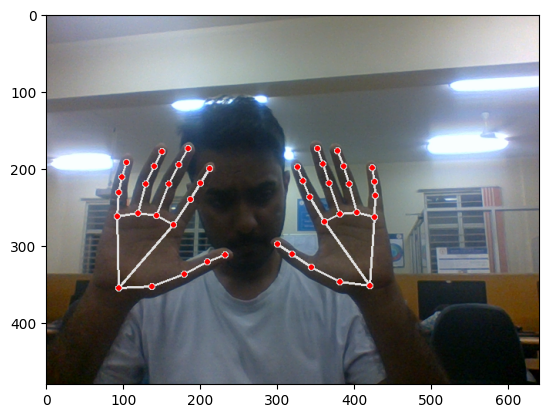

In [60]:
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.show()

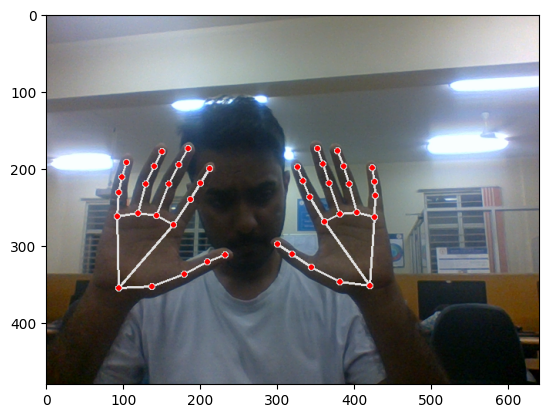

In [61]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [62]:


# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [63]:
# lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
lh

array([ 6.57276392e-01,  7.33927250e-01,  2.92726952e-07,  5.95854461e-01,
        7.24777579e-01, -1.80303250e-02,  5.38080692e-01,  6.84478402e-01,
       -2.38068756e-02,  4.98899907e-01,  6.48934841e-01, -2.88388282e-02,
        4.69169378e-01,  6.22596323e-01, -3.34924087e-02,  5.64652681e-01,
        5.62491357e-01, -3.44757689e-03,  5.35791516e-01,  4.94461894e-01,
       -1.43920360e-02,  5.20332575e-01,  4.51277435e-01, -2.63233744e-02,
        5.09402990e-01,  4.13515359e-01, -3.61046717e-02,  5.96606433e-01,
        5.40552199e-01, -6.95878547e-03,  5.74677527e-01,  4.57588643e-01,
       -1.45214908e-02,  5.61516404e-01,  4.05463725e-01, -2.46383063e-02,
        5.50772727e-01,  3.63329142e-01, -3.30874585e-02,  6.30321205e-01,
        5.36966026e-01, -1.45692481e-02,  6.15137219e-01,  4.58809853e-01,
       -2.49977075e-02,  6.03266060e-01,  4.11044419e-01, -3.42723280e-02,
        5.90737462e-01,  3.69759321e-01, -4.20131572e-02,  6.66423023e-01,
        5.48305273e-01, -

In [64]:
results.left_hand_landmarks
results.right_hand_landmarks


landmark {
  x: 0.147143215
  y: 0.740007281
  z: 4.69038696e-007
}
landmark {
  x: 0.215510234
  y: 0.735548317
  z: -0.0259776153
}
landmark {
  x: 0.279739976
  y: 0.703143239
  z: -0.0355693437
}
landmark {
  x: 0.327106833
  y: 0.670580626
  z: -0.0439219661
}
landmark {
  x: 0.363872588
  y: 0.65064013
  z: -0.0521224141
}
landmark {
  x: 0.258927971
  y: 0.5700562
  z: -0.0126857366
}
landmark {
  x: 0.292553067
  y: 0.500821233
  z: -0.0282015484
}
landmark {
  x: 0.312926352
  y: 0.456601799
  z: -0.043316815
}
landmark {
  x: 0.331326663
  y: 0.418582052
  z: -0.0546619706
}
landmark {
  x: 0.223797992
  y: 0.544723809
  z: -0.0133709386
}
landmark {
  x: 0.249930248
  y: 0.459259868
  z: -0.0267674215
}
landmark {
  x: 0.26995948
  y: 0.406899691
  z: -0.0420637541
}
landmark {
  x: 0.287888616
  y: 0.364350796
  z: -0.0535437763
}
landmark {
  x: 0.186043844
  y: 0.538744152
  z: -0.0180303436
}
landmark {
  x: 0.202276707
  y: 0.458351135
  z: -0.0334454812
}
landmark {
  

In [65]:

def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z,] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])



In [ ]:
lh

array([ 6.57276392e-01,  7.33927250e-01,  2.92726952e-07,  5.95854461e-01,
        7.24777579e-01, -1.80303250e-02,  5.38080692e-01,  6.84478402e-01,
       -2.38068756e-02,  4.98899907e-01,  6.48934841e-01, -2.88388282e-02,
        4.69169378e-01,  6.22596323e-01, -3.34924087e-02,  5.64652681e-01,
        5.62491357e-01, -3.44757689e-03,  5.35791516e-01,  4.94461894e-01,
       -1.43920360e-02,  5.20332575e-01,  4.51277435e-01, -2.63233744e-02,
        5.09402990e-01,  4.13515359e-01, -3.61046717e-02,  5.96606433e-01,
        5.40552199e-01, -6.95878547e-03,  5.74677527e-01,  4.57588643e-01,
       -1.45214908e-02,  5.61516404e-01,  4.05463725e-01, -2.46383063e-02,
        5.50772727e-01,  3.63329142e-01, -3.30874585e-02,  6.30321205e-01,
        5.36966026e-01, -1.45692481e-02,  6.15137219e-01,  4.58809853e-01,
       -2.49977075e-02,  6.03266060e-01,  4.11044419e-01, -3.42723280e-02,
        5.90737462e-01,  3.69759321e-01, -4.20131572e-02,  6.66423023e-01,
        5.48305273e-01, -

In [67]:
extract_keypoints(results).shape

(126,)

In [68]:
z=len(results.left_hand_landmarks.landmark)
y=len(results.right_hand_landmarks.landmark)
print(z,y)

21 21


In [69]:
result_test=extract_keypoints(results)

In [70]:
result_test

array([ 6.57276392e-01,  7.33927250e-01,  2.92726952e-07,  5.95854461e-01,
        7.24777579e-01, -1.80303250e-02,  5.38080692e-01,  6.84478402e-01,
       -2.38068756e-02,  4.98899907e-01,  6.48934841e-01, -2.88388282e-02,
        4.69169378e-01,  6.22596323e-01, -3.34924087e-02,  5.64652681e-01,
        5.62491357e-01, -3.44757689e-03,  5.35791516e-01,  4.94461894e-01,
       -1.43920360e-02,  5.20332575e-01,  4.51277435e-01, -2.63233744e-02,
        5.09402990e-01,  4.13515359e-01, -3.61046717e-02,  5.96606433e-01,
        5.40552199e-01, -6.95878547e-03,  5.74677527e-01,  4.57588643e-01,
       -1.45214908e-02,  5.61516404e-01,  4.05463725e-01, -2.46383063e-02,
        5.50772727e-01,  3.63329142e-01, -3.30874585e-02,  6.30321205e-01,
        5.36966026e-01, -1.45692481e-02,  6.15137219e-01,  4.58809853e-01,
       -2.49977075e-02,  6.03266060e-01,  4.11044419e-01, -3.42723280e-02,
        5.90737462e-01,  3.69759321e-01, -4.20131572e-02,  6.66423023e-01,
        5.48305273e-01, -

In [71]:
21*3+21*3


126

In [72]:
np.save('0', result_test)

In [73]:
np.load('0.npy')

array([ 6.57276392e-01,  7.33927250e-01,  2.92726952e-07,  5.95854461e-01,
        7.24777579e-01, -1.80303250e-02,  5.38080692e-01,  6.84478402e-01,
       -2.38068756e-02,  4.98899907e-01,  6.48934841e-01, -2.88388282e-02,
        4.69169378e-01,  6.22596323e-01, -3.34924087e-02,  5.64652681e-01,
        5.62491357e-01, -3.44757689e-03,  5.35791516e-01,  4.94461894e-01,
       -1.43920360e-02,  5.20332575e-01,  4.51277435e-01, -2.63233744e-02,
        5.09402990e-01,  4.13515359e-01, -3.61046717e-02,  5.96606433e-01,
        5.40552199e-01, -6.95878547e-03,  5.74677527e-01,  4.57588643e-01,
       -1.45214908e-02,  5.61516404e-01,  4.05463725e-01, -2.46383063e-02,
        5.50772727e-01,  3.63329142e-01, -3.30874585e-02,  6.30321205e-01,
        5.36966026e-01, -1.45692481e-02,  6.15137219e-01,  4.58809853e-01,
       -2.49977075e-02,  6.03266060e-01,  4.11044419e-01, -3.42723280e-02,
        5.90737462e-01,  3.69759321e-01, -4.20131572e-02,  6.66423023e-01,
        5.48305273e-01, -

In [74]:
'''FOLDER SETTING UP'''

'FOLDER SETTING UP'

In [75]:
import os
DATA_PATH=os.path.join('MP_Data')
actions=np.array(['stand','help','what','baby','friend','love_you','stop','pain','more','play'])
no_sequence=30
sequence_lenth=30


In [76]:
for action in actions:
    for sequence in range(no_sequence):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [77]:
''' COLLECTION OF KEYPOINTS_ TRAINING AND TESTING '''

' COLLECTION OF KEYPOINTS_ TRAINING AND TESTING '

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    

    for action in actions:

        for sequence in range(no_sequence):

            for frame_num in range(sequence_lenth):

                ret, frame = cap.read()


                image, results = mediapipe_detection(frame, holistic)
#                 print(results)


                draw_styled_landmarks(image, results)
                

                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                    
                keypoints=extract_keypoints(results)
                npy_path=os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path,keypoints)
                

                cv2.imshow('OpenCV Feed', image)
                

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)


            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 